# Домашнее задание №4. Генетические алгоритмы

В этом домашнем задании тренируемся в использовании модуля DEAP. Ничего нового придумывать не придется, но нужно разобраться, как при помощи него сделать то же самое, что делали в примерах на лекции и семинаре.

## Задание 1

Ниже приведен код с лекции, решающий следующую задачу:
 
Найти максимум следующей функции:

$ f(x) = x \sin(10 \pi x) + 1$ на интервале: $x \in [0, 1]$

Поколение 10: Лучшее значение функции приспособленности = 1.6508
Поколение 20: Лучшее значение функции приспособленности = 1.6508
Поколение 30: Лучшее значение функции приспособленности = 1.6508
Поколение 40: Лучшее значение функции приспособленности = 1.6508
Поколение 50: Лучшее значение функции приспособленности = 1.6508
Поколение 60: Лучшее значение функции приспособленности = 1.6508
Поколение 70: Лучшее значение функции приспособленности = 1.6508
Поколение 80: Лучшее значение функции приспособленности = 1.6508
Поколение 90: Лучшее значение функции приспособленности = 1.6508
Поколение 100: Лучшее значение функции приспособленности = 1.6508


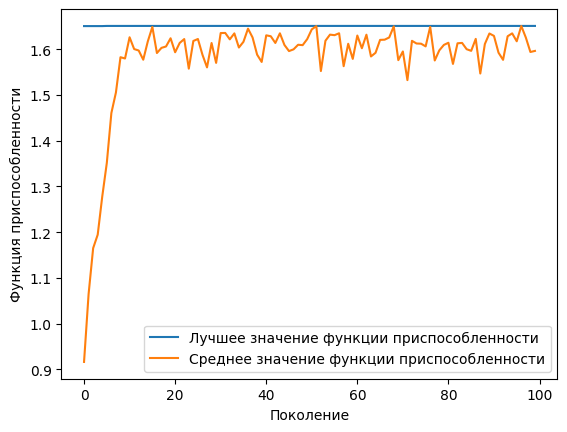

Оптимальное значение x = 0.6515
Максимум функции = 1.6508


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры GA
POPULATION_SIZE = 50  # Размер популяции
GENERATIONS = 100  # Количество поколений
CHROMOSOME_LENGTH = 16  # Количество бит для кодирования переменной x
CROSSOVER_RATE = 0.7  # Вероятность кроссовера
MUTATION_RATE = 0.01  # Вероятность мутации

# Функция для оптимизации
def fitness_function(x):
    # Целевая функция, которую необходимо максимизировать
    return x * np.sin(10 * np.pi * x) + 1

# Декодирование бинарной хромосомы в число x
def decode_chromosome(chromosome):
    # Преобразует хромосому из бинарного представления в вещественное число в диапазоне [0, 1]
    max_value = 2**CHROMOSOME_LENGTH - 1  # Максимальное значение для данного количества бит
    decimal_value = int(''.join(str(bit) for bit in chromosome), 2)  # Перевод из двоичной в десятичную систему
    x = decimal_value / max_value  # Нормализация значения в диапазон [0, 1]
    return x

# Инициализация популяции
def initialize_population():
    # Создание начальной популяции случайных бинарных хромосом
    return np.random.randint(0, 2, (POPULATION_SIZE, CHROMOSOME_LENGTH))

# Оценка фитнеса популяции
def evaluate_fitness(population):
    # Вычисляет значения функции приспособленности для каждой хромосомы в популяции
    fitness = []
    for chromosome in population:
        x = decode_chromosome(chromosome)  # Декодирование хромосомы
        fitness.append(fitness_function(x))  # Вычисление значения функции
    return np.array(fitness)

# Отбор (турнирный)
def selection(population, fitness):
    # Выполняет турнирный отбор, выбирая пары случайных хромосом и добавляя победителя в новую популяцию
    new_population = []
    for _ in range(POPULATION_SIZE):
        i, j = np.random.randint(0, POPULATION_SIZE, 2)  # Выбор двух случайных индексов
        if fitness[i] > fitness[j]:  # Побеждает хромосома с большим фитнесом
            winner = population[i]
        else:
            winner = population[j]
        new_population.append(winner)  # Добавление победителя в новую популяцию
    return np.array(new_population)

# Кроссовер (одноточечный)
def crossover(population):
    # Выполняет одноточечный кроссовер между парами хромосом
    new_population = []
    for i in range(0, POPULATION_SIZE, 2):  # Итерация по парам
        parent1 = population[i]
        parent2 = population[i + 1]
        if np.random.rand() < CROSSOVER_RATE:  # Проверка вероятности кроссовера
            point = np.random.randint(1, CHROMOSOME_LENGTH - 1)  # Выбор точки разрыва
            child1 = np.concatenate((parent1[:point], parent2[point:]))  # Формирование потомков
            child2 = np.concatenate((parent2[:point], parent1[point:]))
            new_population.extend([child1, child2])
        else:
            # Если кроссовер не происходит, потомки идентичны родителям
            new_population.extend([parent1, parent2])
    return np.array(new_population)

# Мутация
def mutation(population):
    # Вносит случайные изменения в хромосомы с заданной вероятностью
    for chromosome in population:
        for i in range(CHROMOSOME_LENGTH):
            if np.random.rand() < MUTATION_RATE:  # Проверка вероятности мутации
                chromosome[i] = 1 - chromosome[i]  # Инверсия бита
    return population

# Главный цикл GA
population = initialize_population()  # Инициализация начальной популяции
best_fitness_history = []  # История лучших значений фитнеса
mean_fitness_history = []  # История средних значений фитнеса

for generation in range(GENERATIONS):
    fitness = evaluate_fitness(population)  # Оценка фитнеса текущей популяции
    best_fitness = np.max(fitness)  # Наилучшее значение фитнеса
    mean_fitness = np.mean(fitness)  # Среднее значение фитнеса
    best_fitness_history.append(best_fitness)
    mean_fitness_history.append(mean_fitness)

    # Вывод прогресса каждые 10 поколений
    if (generation + 1) % 10 == 0:
        print(f'Поколение {generation+1}: Лучшее значение функции приспособленности = {best_fitness:.4f}')

    # Генетические операции
    population = selection(population, fitness)  # Отбор
    population = crossover(population)  # Кроссовер
    population = mutation(population)  # Мутация

# Отображение результатов
plt.plot(best_fitness_history, label='Лучшее значение функции приспособленности')
plt.plot(mean_fitness_history, label='Среднее значение функции приспособленности')
plt.xlabel('Поколение')
plt.ylabel('Функция приспособленности')
plt.legend()
plt.show()

# Вывод наилучшего решения
best_index = np.argmax(fitness)  # Индекс наилучшей хромосомы
best_chromosome = population[best_index]  # Наилучшая хромосома
best_x = decode_chromosome(best_chromosome)  # Декодирование хромосомы
print(f'Оптимальное значение x = {best_x:.4f}')
print(f'Максимум функции = {fitness_function(best_x):.4f}')


Перепишите код так, чтобы в нем использовалось как можно больше функционала из модуля DEAP.

Поколение 10: Лучшее значение функции приспособленности = 1.8506
Поколение 20: Лучшее значение функции приспособленности = 1.8506
Поколение 30: Лучшее значение функции приспособленности = 1.8506
Поколение 40: Лучшее значение функции приспособленности = 1.8506
Поколение 50: Лучшее значение функции приспособленности = 1.8506
Поколение 60: Лучшее значение функции приспособленности = 1.8506
Поколение 70: Лучшее значение функции приспособленности = 1.8506
Поколение 80: Лучшее значение функции приспособленности = 1.8506
Поколение 90: Лучшее значение функции приспособленности = 1.8506
Поколение 100: Лучшее значение функции приспособленности = 1.8506


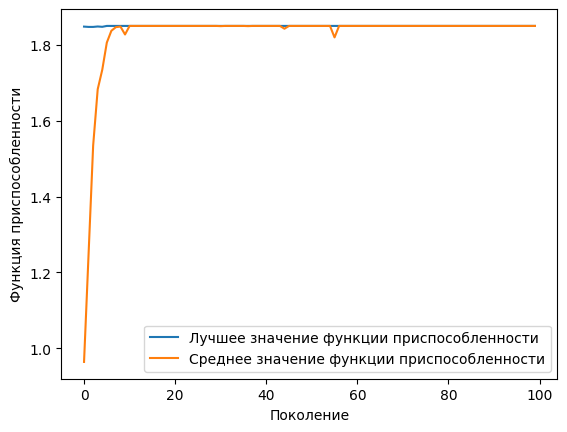

Оптимальное значение x = 0.8512
Максимум функции = 1.8506


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

# Параметры GA
POPULATION_SIZE = 50  # Размер популяции
GENERATIONS = 100  # Количество поколений
CHROMOSOME_LENGTH = 16  # Количество бит для кодирования переменной x
CROSSOVER_RATE = 0.7  # Вероятность кроссовера
MUTATION_RATE = 0.01  # Вероятность мутации

# Функция для оптимизации
def fitness_function(individual):
    # Декодирование бинарной хромосомы в число x
    max_value = 2**CHROMOSOME_LENGTH - 1
    decimal_value = int("".join(map(str, individual)), 2)  # Перевод из двоичной в десятичную систему
    x = decimal_value / max_value  # Нормализация в диапазон [0, 1]
    # Целевая функция
    return x * np.sin(10 * np.pi * x) + 1,

# Настройка DEAP
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Оптимизация на максимум
creator.create("Individual", list, fitness=creator.FitnessMax)

# Инициализация базовых инструментов
toolbox = base.Toolbox()
toolbox.register("attr_bool", np.random.randint, 0, 2)  # Генерация бита (0 или 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=CHROMOSOME_LENGTH)  # Хромосома

toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Популяция

# Регистрация генетических операций
toolbox.register("evaluate", fitness_function)  # Функция оценки
toolbox.register("mate", tools.cxOnePoint)  # Одноточечный кроссовер
toolbox.register("mutate", tools.mutFlipBit, indpb=MUTATION_RATE)  # Мутация (инверсия бита)
toolbox.register("select", tools.selTournament, tournsize=3)  # Турнирный отбор

# Создание начальной популяции
population = toolbox.population(n=POPULATION_SIZE)

# Статистика
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", np.max)
stats.register("mean", np.mean)

# Эволюция
best_fitness_history = []
mean_fitness_history = []

for gen in range(GENERATIONS):
    offspring = algorithms.varAnd(population, toolbox, cxpb=CROSSOVER_RATE, mutpb=MUTATION_RATE)  # Генетические операции
    
    # Оценка потомков
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit

    # Статистика
    record = stats.compile(offspring)
    best_fitness_history.append(record['max'])
    mean_fitness_history.append(record['mean'])

    # Отбор следующего поколения
    population = toolbox.select(offspring, k=len(population))

    # Вывод прогресса
    if (gen + 1) % 10 == 0:
        print(f'Поколение {gen+1}: Лучшее значение функции приспособленности = {record["max"]:.4f}')

# Отображение результатов
plt.plot(best_fitness_history, label='Лучшее значение функции приспособленности')
plt.plot(mean_fitness_history, label='Среднее значение функции приспособленности')
plt.xlabel('Поколение')
plt.ylabel('Функция приспособленности')
plt.legend()
plt.show()

# Поиск лучшего решения
best_individual = tools.selBest(population, k=1)[0]
max_value = 2**CHROMOSOME_LENGTH - 1
decimal_value = int("".join(map(str, best_individual)), 2)
best_x = decimal_value / max_value
print(f'Оптимальное значение x = {best_x:.4f}')
print(f'Максимум функции = {fitness_function(best_individual)[0]:.4f}')


## Задание 2

Ниже приведен код с семинара, решающий следующую задачу:
 
**Задание**:
Двое нашли клад, в котором находятся бриллианты разного размера (и, соответственно, разной цены). Им нужно разделить сокровище на две части таким образом, чтобы разница в цене была равна 0 (или минимальна).

**Формальное определение**:
У нас есть множество чисел $S$. Нам нужно разделить его на два подмножества $S_1$ и $S_2$, так что $$\left|\sum_{i\in S_1}i - \sum_{j\in S_2}j\right|\to\min$$ и $S_1\cup S_2=S$, $S_1\cap S_2=\emptyset$.

Для начала определим множество $S$:

[2226 3346 3444 9520 8213 6757 6403 1974 9645 5076 9601  199  100 2708
 6673 2187 5452 6476 2614 4302 1239 5082 5528 4653 8659 2766 9458 3497
 7563 2992 3405 1959  977 9685 3812 7141 6026 6585 7455 6362  632 8726
 6347 5705 9019 2808 4076  249 2635 4187 1288 5555 7562 9977 5649 4548
 1158 8287 5526 6454 5240  373 4267 3747 8113 9842 5248 4772 2409 3443
 2611 1129 9392 4310 8988 1581 7814 6810 8399 6350  833 5219 7524 2419
  204 1926 7084 3197 6652 3232 3229  429 8742 6499 9010 4749 6397 2133
 3061 6210  218 8191 2842 3879  168 8098 1802 5972 2796 6433  954 1936
 7905 7163 4039 7633 7448 1624 4765 5889 4503  892  359 1313 6444 4728
 5409 7019 8049 8780 3949 6711 1865 8405 7524 9467 3535 6175 8267 3318
 4841 5887 5456 3864 2221 2072 9193 2109 5082 7253 1274 3470 4852 7833
 9987 9629 7766 1100 6014 8654 6610 2926 5712 2710 5232 3152 1150 6849
 5308 4663 6753 3984  821 5370 2001 5186  639 7937 8306 6536 2193 6475
 3045 4349 7561 7636 6069 9355 5993 5595 8623 5204 6933 5332 7779 7049
 7572 


[1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0
 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0
 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1
 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 1 1
 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1
 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1] 6


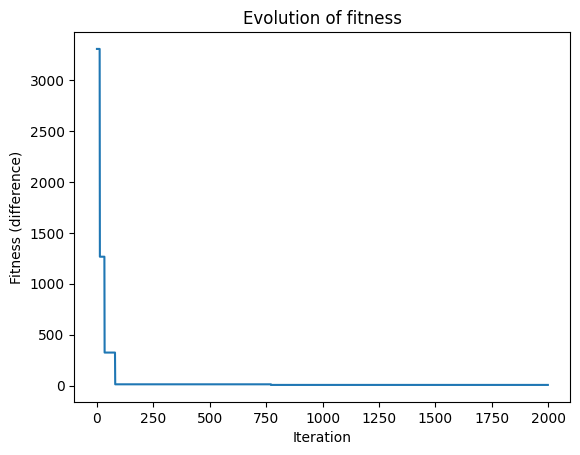

In [6]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Определяем количество элементов в множестве
N = 200

# Генерируем массив из N случайных целых чисел в диапазоне от 1 до 10000
S = np.array([random.randint(1, 10000) for _ in range(N)])
print(S)

# Функция для генерации случайного двоичного вектора (решения)
def generate(S):
    return np.array([random.randint(0, 1) for _ in S])

# Функция для оценки качества решения (разница между суммами двух подмножеств)
def fit(B, S = S):
    c1 = (B * S).sum()  # Сумма элементов, соответствующих единицам в векторе B
    c2 = ((1 - B) * S).sum()  # Сумма элементов, соответствующих нулям в векторе B
    return abs(c1 - c2)  # Возвращаем абсолютную разницу между c1 и c2

# Функция для мутации решения (изменяем случайный бит)
def mutate(b):
    x = b.copy()
    i = random.randint(0, len(b) - 1)  # Выбираем случайный индекс
    x[i] = 1 - x[i]  # Инвертируем значение бита
    return x

# Функция для скрещивания двух решений (однородное кроссинговер)
def xover(b1, b2):
    x = generate(b1)  # Генерируем случайный двоичный вектор для выбора генов
    return b1 * x + b2 * (1 - x)  # Формируем новое решение как комбинацию b1 и b2

# Размер популяции
pop_size = 30

# Инициализируем начальную популяцию случайными решениями
P = [generate(S) for _ in range(pop_size)]

# Функция для выполнения эволюции
# P - популяция, S - множество, n - количество итераций
def evolve(P, S = S, n = 2000):
    res = []  # Список для хранения значений минимальной разницы на каждой итерации
    for _ in range(n):
        # Находим минимальное значение функции приспособленности в текущей популяции
        f = min([fit(b) for b in P])
        res.append(f)

        # Прекращаем эволюцию, если найдено идеальное решение
        if f == 0:
            break

        # Выбираем случайное действие: мутация или скрещивание
        if random.randint(1, 10) < 3:  # 30% вероятность мутации
            i = random.randint(0, len(P) - 1)  # Случайный индекс решения для мутации
            b = mutate(P[i])  # Мутируем решение
            i = np.argmax([fit(z) for z in P])  # Находим худшее решение в популяции
            P[i] = b  # Заменяем худшее решение на новое
        else:  # 70% вероятность скрещивания
            i = random.randint(0, len(P)-1)  # Первый родитель
            j = random.randint(0, len(P)-1)  # Второй родитель
            b = xover(P[i], P[j])  # Получаем потомка

            # Заменяем одно из родителей потомком, если он лучше
            if fit(b) < fit(P[i]):
                P[i] = b
            elif fit(b) < fit(P[j]):
                P[j] = b

    # Возвращаем лучшее решение и историю значений приспособленности
    i = np.argmin([fit(b) for b in P])
    return (P[i], res)

# Запускаем эволюцию
(s, hist) = evolve(P)

# Выводим найденное решение и его качество
print(s, fit(s))

# Отображаем график изменения минимальной разницы за итерации
plt.plot(hist)
plt.xlabel("Iteration")
plt.ylabel("Fitness (difference)")
plt.title("Evolution of fitness")
plt.show()

Перепишите код так, чтобы в нем использовалось как можно больше функционала из модуля DEAP.

[4024 6783 7027 4349 3044 4256 4224 8639 3072 5866 8902  897 2877 6787
  335 5355 4218 8991 3098 7861 4151 8815 9692 6133 3799 4461 4173 5468
 9295 2853 9629 2395 5123 6629  254 1391 8460 9603 2933 4137 4413 6720
 5373 9156 4696 4256 5001 9695  269 1213 3035 1268 7231 7836 8331 2099
  754 4973 6756 8427 6738 4703 3372 1288  390 2343 1140 6413 1928 3140
  325 6448 3495 8777 9446 6073 2477 1679 7171 2016 6998 9081 4218 2813
  325 1513  382 9184 1058 1953 2339 9294 8465 5525 6924 9094 5179 6353
 3555 3454 3944 2738 7262 2617 7314 1814 7712 2115 7075 1040 9132 9449
 6215 9420 3819 7753 5797 9162 6319 9708 3153 8066 1296 3661 3389  579
 4680 3145 1494 5534  810   82 5810 6802 5671 7906 8525 7135 4694 9154
 9101 3593 6840 1997 1425 3464 6028 2281 4849 3271 1550 6688  145 1401
 6509 1458 1252 5227 6106 2380 5384 6937 6914 5665 4939 8697 6390 1299
 6287 8357 1433  719 4910  915 7978 2825 7491 2330 1568 1138 3209 7610
 8722 7552 2044 3477 4152 5896 7622 3977 9703 4448 8545 9506 2412 7895
 4177 

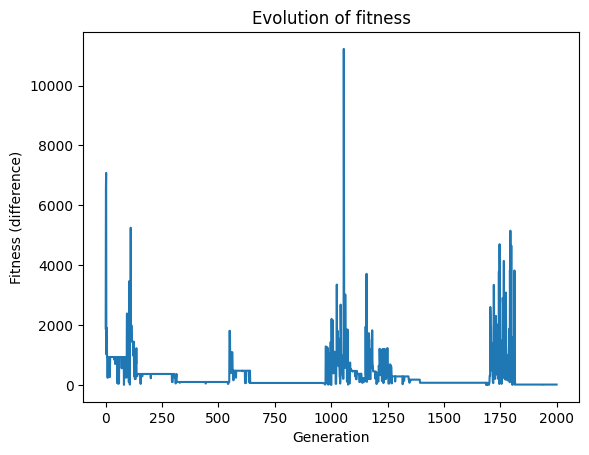

In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

# Определяем количество элементов в множестве
N = 200

# Генерируем массив из N случайных целых чисел в диапазоне от 1 до 10000
S = np.array([random.randint(1, 10000) for _ in range(N)])
print(S)

# Создаем типы для DEAP
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))  # Для минимизации разницы
creator.create("Individual", list, fitness=creator.FitnessMin)

# Инициализируем основные компоненты DEAP
toolbox = base.Toolbox()

# Генерация случайного индивида (двоичного вектора)
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=N)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Функция приспособленности (разница между суммами двух подмножеств)
def evalFitness(individual):
    c1 = np.dot(individual, S)  # Сумма элементов, соответствующих единицам
    c2 = np.dot(1 - np.array(individual), S)  # Сумма элементов, соответствующих нулям
    return abs(c1 - c2),

toolbox.register("evaluate", evalFitness)

# Операторы: мутация, скрещивание и селекция
toolbox.register("mate", tools.cxUniform, indpb=0.5)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

# Размер популяции и число поколений
pop_size = 30
n_generations = 2000

# Создаем начальную популяцию
population = toolbox.population(n=pop_size)

# Запускаем эволюционный процесс
hof = tools.HallOfFame(1)  # Архив для хранения лучшего решения
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)

result_pop, log = algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.3, ngen=n_generations, 
                                      stats=stats, halloffame=hof, verbose=True)

# Выводим лучшее найденное решение
best_ind = hof[0]
print("Best individual is:", best_ind)
print("Fitness:", evalFitness(best_ind))

# Построение графика истории минимальных значений приспособленности
min_fitness_values = [gen["min"] for gen in log]
plt.plot(min_fitness_values)
plt.xlabel("Generation")
plt.ylabel("Fitness (difference)")
plt.title("Evolution of fitness")
plt.show()